# COVID-19 Dissemination Analysis

## Using the dataset provided by Our World in Data I will develop an analysis related to Covid-19. The goal of the analysis is to obtain information on cases, vaccinations, and deaths for each continent in order to develop a summary that focuses on individual continents versus the world. 
## For each continent, I will determine the total cases and deaths, presenting the percentage of deaths to total world cases, and for a clearer visualization, I will generate a graph illustrating the total deaths with their percentage breakdown by continent.
## For a more in-depth analysis, I will develop a function that allows me to compare (as input) two continents; I want the statistical descriptors (minimum, maximum, mean, and percentage) against global cases for both cases and vaccinations on the specified continents. 
## Then I will create a function that allows me to display data on cases, vaccinations, and deaths for all continents, going on to create a graph for displaying these three elements by specifying the minimum and maximum for each continent.



In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df_covid = pd.read_csv('covid_19.csv', low_memory = False)

In [82]:
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376962,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376963,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376964,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376965,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


# Displaying rows and columns

In [7]:
print('The number of the rows is:', df_covid.shape[0])
print('The number of the columns is:', df_covid.shape[1])

The number of the rows is: 376967
The number of the columns is: 67


# Header

In [8]:
print('The header is:', df_covid.columns)

The header is: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoot

# Total number of cases and total deaths (without considering locations that do not belong to any continent)

In [9]:
max_cases = df_covid.loc[df_covid.continent.notnull()]

In [10]:
''' We check the totals by referring to the total_cases column. In the total_cases column we cannot sum the data because the data is updated to the new number of cases for each day, 
we have to use the total_cases.max() method'''

tot_cases = max_cases.groupby('continent')['total_cases'].max()
print('The total number of cases by continent is:')
for continent, total_cases in tot_cases.items():
    print(f'{continent} - {total_cases}')
print()
print(f'The total cases are:', tot_cases.sum())

The total number of cases by continent is:
Africa - 4072636.0
Asia - 99329249.0
Europe - 38997490.0
North America - 103436829.0
Oceania - 11769858.0
South America - 37519960.0

The total cases are: 295126022.0


In [11]:
# We check the total deats by referring to the total_deaths column. the same thing applies to the total dead, we use the method as before, total_deaths.max()

max_deaths = df_covid.loc[df_covid.continent.notnull()]
tot_deaths = max_deaths.groupby('continent')['total_deaths'].max()
print('The total deaths by continent are:')
for continent, total_deaths in tot_deaths.items():
    print(f'{continent} - {total_deaths}')

# we create a variable to find the percentage of deaths in the total global cases.

totcases = tot_cases.sum()
totdeaths = tot_deaths.sum()
percentage = (totdeaths / totcases) * 100

print()
print(f'Total cases are:', tot_cases.sum(), 'and')
print(f'the total deaths are:', tot_deaths.sum())
print(f'the proportion of deaths to the total number of cases is {round(percentage, 2)}%.')

The total deaths by continent are:
Africa - 102595.0
Asia - 533454.0
Europe - 401884.0
North America - 1170784.0
Oceania - 24566.0
South America - 702116.0

Total cases are: 295126022.0 and
the total deaths are: 2935399.0
the proportion of deaths to the total number of cases is 0.99%.


In [12]:
# We create a variable to find the percentage of deaths in the total global cases, broken down by continents

tot_cases = df_covid.groupby('continent')['total_cases'].max()
death_percentage = (tot_deaths / tot_cases) * 100
print('The death percentage by continent is:')
for continent, percentage in death_percentage.items():
    print(f'{continent} : {percentage:.2f}%')

The death percentage by continent is:
Africa : 2.52%
Asia : 0.54%
Europe : 1.03%
North America : 1.13%
Oceania : 0.21%
South America : 1.87%


# We create the required graph, total deaths divided into percentages for each continent

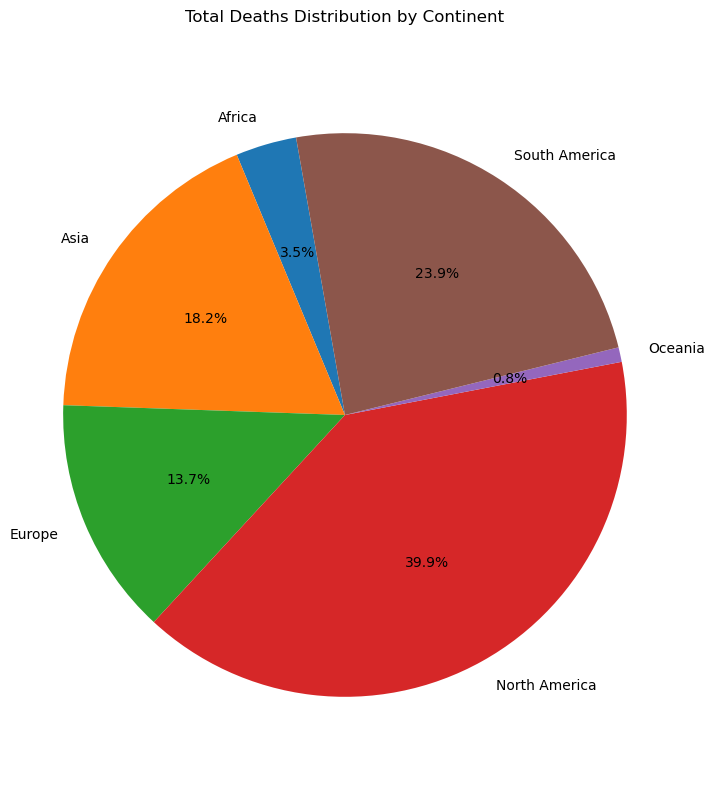


Total deaths are: 2935399.0


In [13]:
# data for pie chart

labels = tot_deaths.index
sizes = tot_deaths.values

# chart creation

plt.figure(figsize=(8, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=100)

# title

plt.title('Total Deaths Distribution by Continent')

# show the graph

plt.axis('equal')  
plt.show()

print()
print(f'Total deaths are: {tot_deaths.sum()}')

# We develop the function, check the data

In [14]:
# we check the continents

continents = pd.Series(df_covid.continent.unique())
continents

0             Asia
1              NaN
2           Europe
3           Africa
4          Oceania
5    North America
6    South America
dtype: object

In [15]:
# we found null values, we don't have to consider them

df_covid = df_covid.drop(df_covid.loc[df_covid.continent.isnull()].index)
df_covid.reset_index(drop = True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358911,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358912,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358913,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358914,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [16]:
# new check, withount null values

continents = pd.Series(df_covid.continent.unique())
continents

0             Asia
1           Europe
2           Africa
3          Oceania
4    North America
5    South America
dtype: object

In [35]:
# creation of the function: in input we must enter two continents, of our choice, the location of the continents is checked by the variable above.

def case_analysis(df_covid):
    cont_1 = input("Insert the name of the first continent: \n")
    cont_2 = input("Insert the name of the second continent: \n")
    continents = pd.Series(df_covid.continent.unique())
 
    position_1 = (continents == cont_1).idxmax()
    cont_sel_1 = df_covid.continent.unique()[position_1]
    
    position_2 = (continents == cont_2).idxmax()
    cont_sel_2 = df_covid.continent.unique()[position_2]
 
 # variables to find min, max, avg
 
    min_cases = df_covid.groupby('continent')['total_cases'].min()
    max_cases = df_covid.groupby('continent')['total_cases'].max()
    avg_cases = df_covid.groupby('continent')['total_cases'].mean()
  
 # variables to find percentage
    
    tot_cases = sum(max_cases)
    percentage_1 = (max_cases[cont_1] / tot_cases) * 100
    percentage_2 = (max_cases[cont_2] / tot_cases) * 100
    
   
    print()
    print(f'The continent {cont_1} has:')
    print(f'minimum cases are - {(min_cases.loc[cont_1])}')
    print(f'maximum cases are - {(max_cases.loc[cont_1])}')
    print(f'with the average of - {(avg_cases.loc[cont_1]):.2f}')
    print(f'which corresponds to the {round(percentage_1, 2)}% compared with the total number of cases ({tot_cases}).\n')
    
    print(f'The continent {cont_2} has:')
    print(f'minimum cases are - {(min_cases.loc[cont_2])}')
    print(f'maximum cases are - {(max_cases.loc[cont_2])}')
    print(f'with the average of - {(avg_cases.loc[cont_2]):.2f}')
    print(f'which corresponds to the {round(percentage_2, 2)}% compared with the total number of cases ({tot_cases}).\n')
    
   # data for pie chart 
    
    continents_max_cases = max_cases.copy()
    continents_max_cases.drop(labels=[cont_1, cont_2], inplace=True)
    other_continent_cases = continents_max_cases.sum()
    
    sizes = [max_cases.loc[cont_1], max_cases.loc[cont_2], other_continent_cases]
    labels = [cont_1, cont_2, 'Rest of World']
    
    # percentage calculation
    
    sizes_percentage = [size / tot_cases * 100 for size in sizes]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes_percentage, labels=labels, autopct='%6.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title('Percentage of maximum cases by continent')
    plt.show()

Insert the name of the first continent: 
 Asia
Insert the name of the second continent: 
 North America



The continent Asia has:
minimum cases are - 1.0
maximum cases are - 99329249.0
with the average of - 3079394.30
which corresponds to the 33.66% compared with the total number of cases (295126022.0).

The continent North America has:
minimum cases are - 1.0
maximum cases are - 103436829.0
with the average of - 1793414.92
which corresponds to the 35.05% compared with the total number of cases (295126022.0).



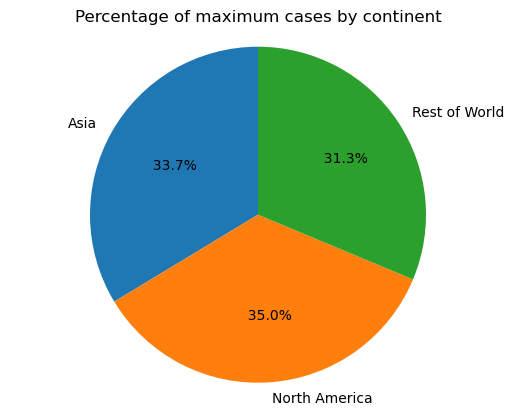

In [36]:
case_analysis(df_covid)

In [33]:
# creation of the function for vaccinations, for all continents

def tot_vaccinations(df_covid):
    min_vacc = df_covid.groupby("continent")["total_vaccinations"].min()
    max_vacc = df_covid.groupby("continent")["total_vaccinations"].max()
    avg_vacc = df_covid.groupby("continent")["total_vaccinations"].mean()

    tot_vacc = sum(max_vacc)
    
    for cont in min_vacc.index:  
        percentage = (max_vacc[cont] / tot_vacc) * 100

        print(f"The continent {cont} has:")
        print(f"the number of minimum vaccinations equal to: {min_vacc[cont]}")
        print(f"maximum vaccinations equal to: {max_vacc[cont]}")
        print(f"with the average of: {avg_vacc[cont]:.2f}")
        print(f"which corresponds to the {round(percentage, 2)}% % compared with the total number of vaccinations ({tot_vacc}).\n")

In [34]:
tot_vaccinations(df_covid)

The continent Africa has:
the number of minimum vaccinations equal to: 0.0
maximum vaccinations equal to: 133048021.0
with the average of: 8012152.22
which corresponds to the 2.64% % compared with the total number of vaccinations (5048818052.0).

The continent Asia has:
the number of minimum vaccinations equal to: 0.0
maximum vaccinations equal to: 3491077000.0
with the average of: 230631503.41
which corresponds to the 69.15% % compared with the total number of vaccinations (5048818052.0).

The continent Europe has:
the number of minimum vaccinations equal to: 0.0
maximum vaccinations equal to: 192221468.0
with the average of: 27277928.56
which corresponds to the 3.81% % compared with the total number of vaccinations (5048818052.0).

The continent North America has:
the number of minimum vaccinations equal to: 0.0
maximum vaccinations equal to: 676728782.0
with the average of: 64695277.36
which corresponds to the 13.4% % compared with the total number of vaccinations (5048818052.0).

T

In [40]:
# creation of the function for total cases, for all continents

def tot_cases(df_covid):
    min_cases = df_covid.groupby("continent")["total_cases"].min()
    max_cases = df_covid.groupby("continent")["total_cases"].max()
    avg_cases = df_covid.groupby("continent")["total_cases"].mean()

    tot_cas = sum(max_cases)
    
    for cont in min_cases.index:  
        percentage = (max_cases[cont] / tot_cas) * 100

        print(f"The continent {cont} has:")
        print(f"the number of minimum cases equal to: {min_cases[cont]}")
        print(f"maximum cases equal to: {max_cases[cont]}")
        print(f"with the average of: {avg_cases[cont]:.2f}")
        print(f"which corresponds to the {round(percentage, 2)}% % compared with the total number of cases ({tot_cas}).\n")

In [41]:
tot_cases(df_covid)

The continent Africa has:
the number of minimum cases equal to: 1.0
maximum cases equal to: 4072636.0
with the average of: 153124.02
which corresponds to the 1.38% % compared with the total number of cases (295126022.0).

The continent Asia has:
the number of minimum cases equal to: 1.0
maximum cases equal to: 99329249.0
with the average of: 3079394.30
which corresponds to the 33.66% % compared with the total number of cases (295126022.0).

The continent Europe has:
the number of minimum cases equal to: 1.0
maximum cases equal to: 38997490.0
with the average of: 2602675.78
which corresponds to the 13.21% % compared with the total number of cases (295126022.0).

The continent North America has:
the number of minimum cases equal to: 1.0
maximum cases equal to: 103436829.0
with the average of: 1793414.92
which corresponds to the 35.05% % compared with the total number of cases (295126022.0).

The continent Oceania has:
the number of minimum cases equal to: 1.0
maximum cases equal to: 1176

In [48]:
# creation of the function for total deaths, for all continents

def tot_deaths(df_covid):
    min_deaths = df_covid.groupby('continent')['total_deaths'].min()
    max_deaths = df_covid.groupby('continent')['total_deaths'].max()
    avg_deaths = df_covid.groupby('continent')['total_deaths'].mean()
    
    tot_death = sum(max_deaths)
    
    for cont in min_deaths.index:
        percentage = (max_deaths[cont] / tot_death) * 100
        
        print(f"The continent {cont} has:")
        print(f"the number of minimum deaths equal to: {min_deaths[cont]}")
        print(f"maximum deaths equal to: {max_deaths[cont]}")
        print(f"with the average of: {avg_deaths[cont]:.2f}")
        print(f"which corresponds to the {round(percentage, 2)}% % compared with the total number of deaths ({tot_death}).\n")

In [49]:
tot_deaths(df_covid)

The continent Africa has:
the number of minimum deaths equal to: 1.0
maximum deaths equal to: 102595.0
with the average of: 3386.95
which corresponds to the 3.5% % compared with the total number of deaths (2935399.0).

The continent Asia has:
the number of minimum deaths equal to: 1.0
maximum deaths equal to: 533454.0
with the average of: 24500.80
which corresponds to the 18.17% % compared with the total number of deaths (2935399.0).

The continent Europe has:
the number of minimum deaths equal to: 1.0
maximum deaths equal to: 401884.0
with the average of: 28127.09
which corresponds to the 13.69% % compared with the total number of deaths (2935399.0).

The continent North America has:
the number of minimum deaths equal to: 1.0
maximum deaths equal to: 1170784.0
with the average of: 29494.68
which corresponds to the 39.89% % compared with the total number of deaths (2935399.0).

The continent Oceania has:
the number of minimum deaths equal to: 1.0
maximum deaths equal to: 24566.0
with t

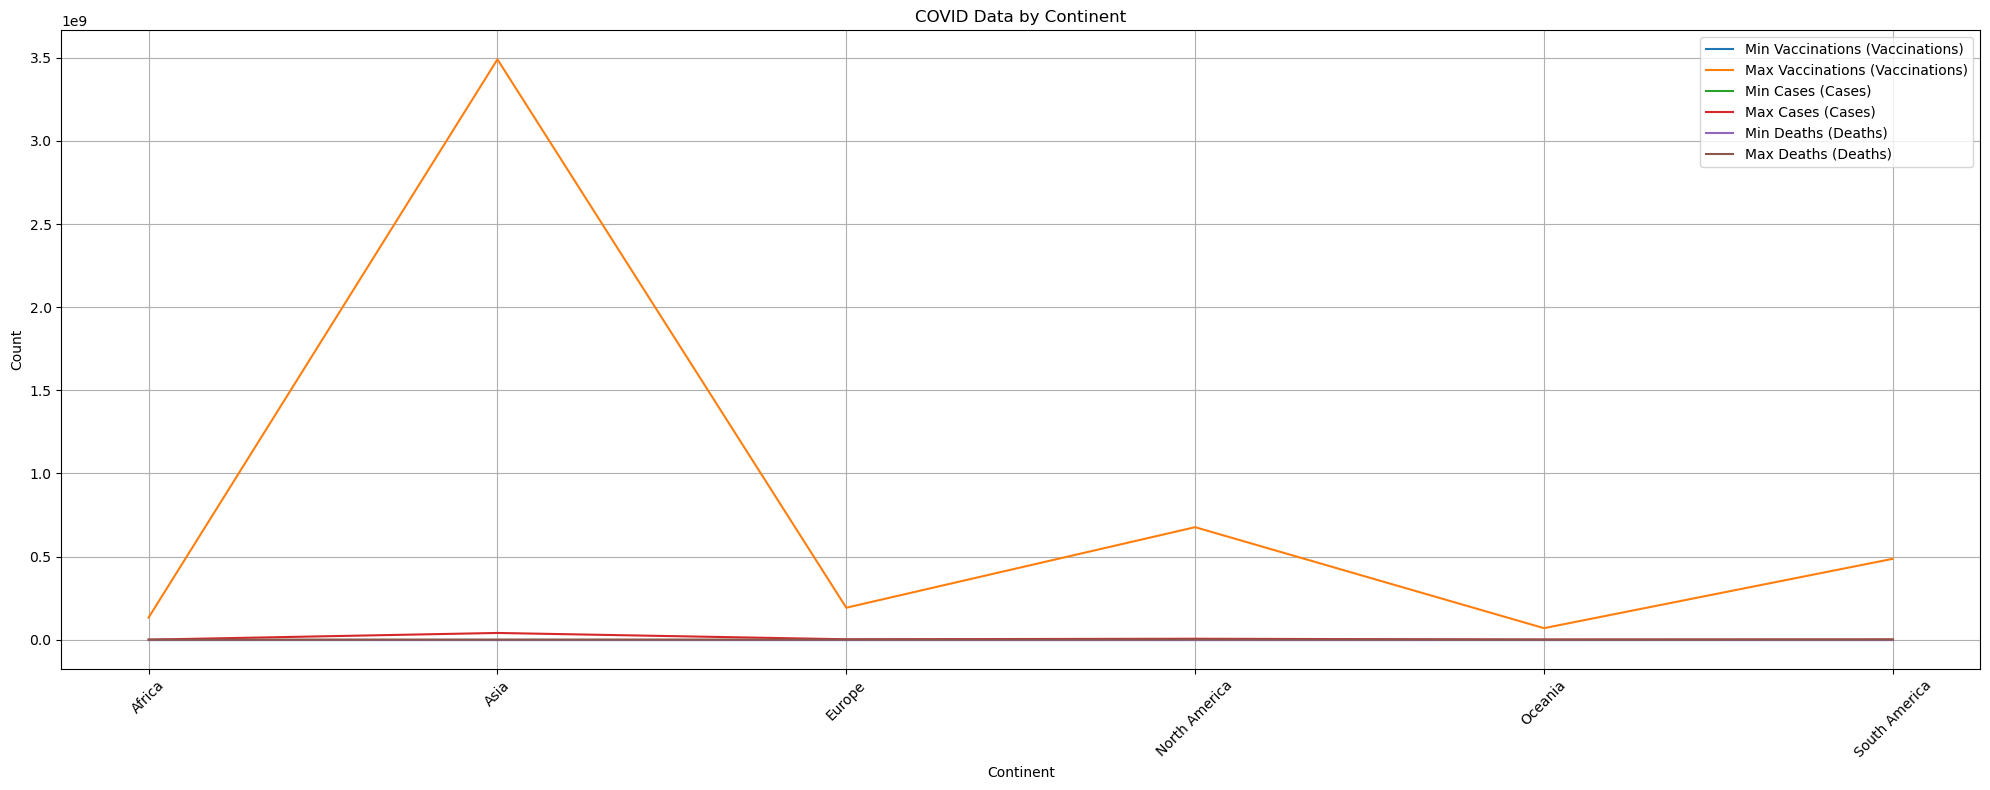

In [101]:
import matplotlib.pyplot as plt

def tot_vaccinations(df_covid):
    min_vacc = df_covid.groupby("continent")["total_vaccinations"].min()
    max_vacc = df_covid.groupby("continent")["total_vaccinations"].max()

    data = {"Continent": [], "Min Vaccinations": [], "Max Vaccinations": []}
    
    for cont in min_vacc.index:  
        data["Continent"].append(cont)
        data["Min Vaccinations"].append(min_vacc[cont])
        data["Max Vaccinations"].append(max_vacc[cont])

    return data

def tot_cases(df_covid):
    min_cases = df_covid.groupby("continent")["new_cases"].min()
    max_cases = df_covid.groupby("continent")["new_cases"].max()

    data = {"Continent": [], "Min Cases": [], "Max Cases": []}

    for cont in min_cases.index:  
        data["Continent"].append(cont)
        data["Min Cases"].append(min_cases[cont])
        data["Max Cases"].append(max_cases[cont])

    return data

def tot_deaths(df_covid):
    min_deaths = df_covid.groupby('continent')['total_deaths'].min()
    max_deaths = df_covid.groupby('continent')['total_deaths'].max()
    
    data = {"Continent": [], "Min Deaths": [], "Max Deaths": []}
    
    for cont in min_deaths.index:
        data["Continent"].append(cont)
        data["Min Deaths"].append(min_deaths[cont])
        data["Max Deaths"].append(max_deaths[cont])
    
    return data

# Get the data for vaccinations, cases, and deaths
vacc_data = tot_vaccinations(df_covid)
cases_data = tot_cases(df_covid)
deaths_data = tot_deaths(df_covid)

# Plotting
plt.figure(figsize=(20, 8))

# Plot vaccinations
for key in ["Min Vaccinations", "Max Vaccinations"]:
    plt.plot(vacc_data["Continent"], vacc_data[key], label=key + " (Vaccinations)")

# Plot cases
for key in ["Min Cases", "Max Cases"]:
    plt.plot(cases_data["Continent"], cases_data[key], label=key + " (Cases)")

# Plot deaths
for key in ["Min Deaths", "Max Deaths"]
    plt.plot(deaths_data["Continent"], deaths_data[key], label=key + " (Deaths)")

plt.title('COVID Data by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparative COVID-19 Analysis by Continent

Based on the data obtained, we can develop the following:

Africa vaccinated a total of 133,048,021 people, with an average of about 8,012,152 doses administered. This figure represents 2.64% of the world total of vaccinations. Relative to COVID-19 cases, Africa recorded up to 4,072,636 cases, with an average of about 153,124 cases. However, the mortality rate was relatively low, with a high of 102,595 deaths, representing 3.5 percent of the world total.

Asia proved to be a leader in vaccination, with a maximum of 3,491,077,000 doses administered, accounting for 69.15 percent of the world total. In terms of COVID-19 cases, it reported up to 99,329,249 cases, with an average of about 3,079,394. The region also experienced a significant number of deaths, with a high of 533,454, corresponding to18.17% of the world total.

Europe reached a high of 192,221,468 vaccinations, accounting for 3.81 percent of the world total. COVID-19 cases in Europe reached up to 38,997,490, averaging about 2,602,676. The continent saw a significant number of deaths, with a high of 401,884, representing 13.69% of the world total.

North America, with a high of 676,728,782 doses administered, contributed 13.4 percent of the world total of vaccinations. The region recorded up to 103,436,829 COVID-19 cases, with an average of about 1,793,415. However, the death rate was significantly higher than other regions, with a high of 1,170,784 deaths, corresponding to 39.89% of the world total.

Oceania vaccinated up to 69,306,345 people, corresponding to 1.37% of the world total vaccination reported up to 11,769,858 COVID-19 cases, with an average of about 355,420. Deaths were relatively low, with a high of 24,566, representing 0.84% of the world total.

South America contributed 9.63% of the world total of vaccinations, with a maximum of 486,436,436 doses administered. The region reported up to 37,519,960 COVID-19 cases, with an average of about 3,056,576. The mortality rate was significant, with a maximum of 702,116 deaths, constituting 23.92 percent of the world total.

These data highlight differences in vaccination strategies and pandemic impacts among continents. While some continents have achieved high vaccination coverage, others have faced significant challenges, both in terms of vaccination and case and death management.